# TF2.0---mlp&深度学习常见技巧
### 以MLP模型为例，介绍技巧，包括:
+ 权重初始化
+ 激活函数
+ 优化器
+ batch-Normazitation
+ Dropout
+ 模型集成

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-alpha0


## 1. 导入数据


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 784)   (60000,)
(10000, 784)   (10000,)


## 2. 基础模型

In [6]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])  

model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy']
             )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 模型训练
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)

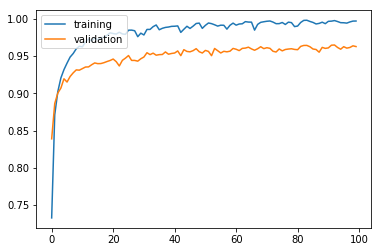

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'], loc='upper left')
plt.savefig('./Train and val Accuracy.png')
plt.show()

In [14]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3724 - accuracy: 0.9640


## 3. 权重初始化
https://www.jianshu.com/p/5fac7674573b
https://blog.csdn.net/VictoriaW/article/details/73000632#
https://blog.csdn.net/m0_37167788/article/details/79073070


In [21]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy']
             )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 15us/sample - loss: 6.8370 - accuracy: 0.7256 - val_loss: 1.8123 - val_accuracy: 0.8257
Epoch 2/100
42000/42000 [==============================] - 1s 12us/sample - loss: 1.2652 - accuracy: 0.8500 - val_loss: 1.0836 - val_accuracy: 0.8482
Epoch 3/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.7635 - accuracy: 0.8768 - val_loss: 0.7698 - val_accuracy: 0.8798
Epoch 4/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.5121 - accuracy: 0.9024 - val_loss: 0.6280 - val_accuracy: 0.8913
Epoch 5/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.4098 - accuracy: 0.9116 - val_loss: 0.5465 - val_accuracy: 0.8942
Epoch 6/100
42000/42000 [==============================] - 1s 12us/sample - loss: 0.3215 - accuracy: 0.9251 - val_loss: 0.5083 - val_accuracy: 0.9075
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.0395 - accuracy: 0.9890 - val_loss: 0.3751 - val_accuracy: 0.9551
Epoch 56/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.0558 - accuracy: 0.9859 - val_loss: 0.4148 - val_accuracy: 0.9523
Epoch 57/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.0967 - accuracy: 0.9788 - val_loss: 0.3499 - val_accuracy: 0.9567
Epoch 58/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.0408 - accuracy: 0.9886 - val_loss: 0.3837 - val_accuracy: 0.9529
Epoch 59/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.3369 - val_accuracy: 0.9594
Epoch 60/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.3487 - val_accuracy: 0.9581
Epoch 61/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.0219 - ac

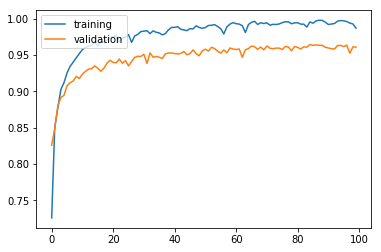

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [24]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3612 - accuracy: 0.9630


## 4. 激活函数

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(784,)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 15us/sample - loss: 1.7317 - accuracy: 0.5830 - val_loss: 0.9780 - val_accuracy: 0.8235
Epoch 2/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.6899 - accuracy: 0.8463 - val_loss: 0.5227 - val_accuracy: 0.8703
Epoch 3/100
42000/42000 [==============================] - 1s 12us/sample - loss: 0.4801 - accuracy: 0.8722 - val_loss: 0.4125 - val_accuracy: 0.8851
Epoch 4/100
42000/42000 [==============================] - 1s 12us/sample - loss: 0.4008 - accuracy: 0.8875 - val_loss: 0.3824 - val_accuracy: 0.8906
Epoch 5/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.3591 - accuracy: 0.8964 - val_loss: 0.3464 - val_accuracy: 0.8953
Epoch 6/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.3362 - accuracy: 0.9025 - val_loss: 0.3129 - val_accuracy: 0.9068
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.1497 - accuracy: 0.9530 - val_loss: 0.1888 - val_accuracy: 0.9446
Epoch 56/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.1515 - accuracy: 0.9529 - val_loss: 0.1903 - val_accuracy: 0.9436
Epoch 57/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.1428 - accuracy: 0.9558 - val_loss: 0.1818 - val_accuracy: 0.9451
Epoch 58/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.1461 - accuracy: 0.9536 - val_loss: 0.1815 - val_accuracy: 0.9447
Epoch 59/100
42000/42000 [==============================] - 1s 12us/sample - loss: 0.1464 - accuracy: 0.9545 - val_loss: 0.1831 - val_accuracy: 0.9444
Epoch 60/100
42000/42000 [==============================] - 0s 12us/sample - loss: 0.1503 - accuracy: 0.9530 - val_loss: 0.1886 - val_accuracy: 0.9404
Epoch 61/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.1539 - ac

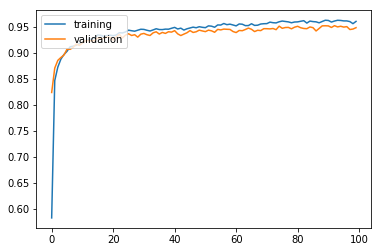

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [30]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.1697 - accuracy: 0.9501


## 5. 优化器

In [37]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')    
])
model.compile(optimizer=keras.optimizers.SGD(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy']
             )
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 14us/sample - loss: 3.6682 - accuracy: 0.6310 - val_loss: 1.6907 - val_accuracy: 0.6656
Epoch 2/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.9706 - accuracy: 0.7665 - val_loss: 1.1418 - val_accuracy: 0.7471
Epoch 3/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.7126 - accuracy: 0.8119 - val_loss: 0.9134 - val_accuracy: 0.7727
Epoch 4/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.5909 - accuracy: 0.8390 - val_loss: 0.5984 - val_accuracy: 0.8408
Epoch 5/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.5165 - accuracy: 0.8565 - val_loss: 0.7005 - val_accuracy: 0.8276
Epoch 6/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.4690 - accuracy: 0.8688 - val_loss: 0.6087 - val_accuracy: 0.8384
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 0s 10us/sample - loss: 0.1522 - accuracy: 0.9546 - val_loss: 0.3319 - val_accuracy: 0.9129
Epoch 56/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.1512 - accuracy: 0.9546 - val_loss: 0.2722 - val_accuracy: 0.9277
Epoch 57/100
42000/42000 [==============================] - 0s 10us/sample - loss: 0.1487 - accuracy: 0.9555 - val_loss: 0.2587 - val_accuracy: 0.9309
Epoch 58/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.1466 - accuracy: 0.9563 - val_loss: 0.2603 - val_accuracy: 0.9305
Epoch 59/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.1444 - accuracy: 0.9570 - val_loss: 0.2998 - val_accuracy: 0.9202
Epoch 60/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.1445 - accuracy: 0.9567 - val_loss: 0.2688 - val_accuracy: 0.9287
Epoch 61/100
42000/42000 [==============================] - 0s 11us/sample - loss: 0.1429 - ac

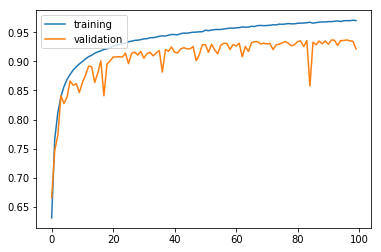

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [40]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.2761 - accuracy: 0.9237


## 6. 批归一化

In [41]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')    
])

model.compile(optimizer=keras.optimizers.SGD(),
             loss = keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_v2 (Batc (None, 64)                256       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 64)                256       
_________________________________________________________________
dense_31 (Dense)             (None, 10)               

In [43]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 22us/sample - loss: 2.2064 - accuracy: 0.2770 - val_loss: 1.7282 - val_accuracy: 0.4287
Epoch 2/100
42000/42000 [==============================] - 1s 15us/sample - loss: 1.4931 - accuracy: 0.5135 - val_loss: 1.2851 - val_accuracy: 0.5926
Epoch 3/100
42000/42000 [==============================] - 1s 16us/sample - loss: 1.1863 - accuracy: 0.6290 - val_loss: 1.0602 - val_accuracy: 0.6703
Epoch 4/100
42000/42000 [==============================] - 1s 15us/sample - loss: 1.0110 - accuracy: 0.6970 - val_loss: 0.9193 - val_accuracy: 0.7290
Epoch 5/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.8900 - accuracy: 0.7422 - val_loss: 0.8239 - val_accuracy: 0.7646
Epoch 6/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.8044 - accuracy: 0.7722 - val_loss: 0.7548 - val_accuracy: 0.7879
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.2417 - accuracy: 0.9331 - val_loss: 0.2673 - val_accuracy: 0.9261
Epoch 56/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.2396 - accuracy: 0.9348 - val_loss: 0.2643 - val_accuracy: 0.9269
Epoch 57/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.2370 - accuracy: 0.9340 - val_loss: 0.2647 - val_accuracy: 0.9271
Epoch 58/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.2360 - accuracy: 0.9349 - val_loss: 0.2620 - val_accuracy: 0.9282
Epoch 59/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.2326 - accuracy: 0.9355 - val_loss: 0.2583 - val_accuracy: 0.9283
Epoch 60/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.2314 - accuracy: 0.9360 - val_loss: 0.2586 - val_accuracy: 0.9293
Epoch 61/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.2280 - ac

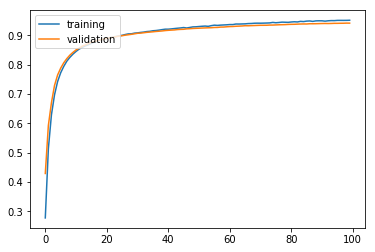

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [45]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.1943 - accuracy: 0.9464


## 7. Dropout

In [51]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.SGD(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy']
             )
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)              

In [52]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 18us/sample - loss: 4.8666 - accuracy: 0.2440 - val_loss: 1.9898 - val_accuracy: 0.3337
Epoch 2/100
42000/42000 [==============================] - 1s 15us/sample - loss: 2.0741 - accuracy: 0.3002 - val_loss: 1.8252 - val_accuracy: 0.3777
Epoch 3/100
42000/42000 [==============================] - 1s 14us/sample - loss: 1.9218 - accuracy: 0.3429 - val_loss: 1.7067 - val_accuracy: 0.4324
Epoch 4/100
42000/42000 [==============================] - 1s 13us/sample - loss: 1.8007 - accuracy: 0.3977 - val_loss: 1.5933 - val_accuracy: 0.4741
Epoch 5/100
42000/42000 [==============================] - 1s 14us/sample - loss: 1.6945 - accuracy: 0.4452 - val_loss: 1.4647 - val_accuracy: 0.5314
Epoch 6/100
42000/42000 [==============================] - 1s 14us/sample - loss: 1.5702 - accuracy: 0.5007 - val_loss: 1.3212 - val_accuracy: 0.5994
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.7574 - accuracy: 0.7732 - val_loss: 0.6301 - val_accuracy: 0.8483
Epoch 56/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.7505 - accuracy: 0.7760 - val_loss: 0.6358 - val_accuracy: 0.8493
Epoch 57/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.7415 - accuracy: 0.7826 - val_loss: 0.6369 - val_accuracy: 0.8550
Epoch 58/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.7338 - accuracy: 0.7861 - val_loss: 0.6026 - val_accuracy: 0.8622
Epoch 59/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.7327 - accuracy: 0.7866 - val_loss: 0.6026 - val_accuracy: 0.8648
Epoch 60/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.7233 - accuracy: 0.7897 - val_loss: 0.6121 - val_accuracy: 0.8697
Epoch 61/100
42000/42000 [==============================] - 1s 18us/sample - loss: 0.7242 - ac

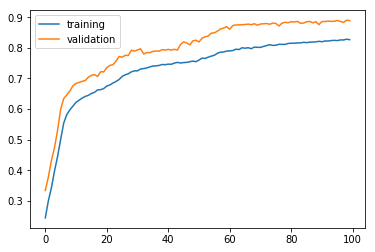

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [54]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.4907 - accuracy: 0.8891


## 8. 模型集成

*×使用投票的方法进行模型集成*×

In [63]:
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def mlp_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(784,)),
        layers.Dropout(0.1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.SGD(),
                 loss=keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy']
                 )
    return model

model1 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=1, batch_size=256, validation_split=0.3)
model2 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=1, batch_size=256, validation_split=0.3)
model3 = KerasClassifier(build_fn=mlp_model, epochs=100, verbose=1, batch_size=256, validation_split=0.3)

In [64]:
ensemble_clf = VotingClassifier(
    estimators=[
        ('model1', model1),('model2', model2), ('model3', model3)
    ],voting='soft')

In [65]:
history = ensemble_clf.fit(x_train, y_train)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 18us/sample - loss: 4.7694 - accuracy: 0.3695 - val_loss: 1.4490 - val_accuracy: 0.5412
Epoch 2/100
42000/42000 [==============================] - 1s 14us/sample - loss: 1.7034 - accuracy: 0.4975 - val_loss: 1.1667 - val_accuracy: 0.6529
Epoch 3/100
42000/42000 [==============================] - 1s 14us/sample - loss: 1.3914 - accuracy: 0.5732 - val_loss: 1.0152 - val_accuracy: 0.6830
Epoch 4/100
42000/42000 [==============================] - 1s 14us/sample - loss: 1.2570 - accuracy: 0.6116 - val_loss: 0.9231 - val_accuracy: 0.7088
Epoch 5/100
42000/42000 [==============================] - 1s 14us/sample - loss: 1.1580 - accuracy: 0.6377 - val_loss: 0.8711 - val_accuracy: 0.7265
Epoch 6/100
42000/42000 [==============================] - 1s 14us/sample - loss: 1.0958 - accuracy: 0.6586 - val_loss: 0.7960 - val_accuracy: 0.7543
Epoch 7/100
42000/42000 [=========================

Epoch 55/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4389 - accuracy: 0.8691 - val_loss: 0.3268 - val_accuracy: 0.9097
Epoch 56/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4402 - accuracy: 0.8703 - val_loss: 0.3258 - val_accuracy: 0.9107
Epoch 57/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4334 - accuracy: 0.8730 - val_loss: 0.3242 - val_accuracy: 0.9111
Epoch 58/100
42000/42000 [==============================] - 1s 12us/sample - loss: 0.4350 - accuracy: 0.8709 - val_loss: 0.3244 - val_accuracy: 0.9099
Epoch 59/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4371 - accuracy: 0.8717 - val_loss: 0.3200 - val_accuracy: 0.9120
Epoch 60/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4301 - accuracy: 0.8741 - val_loss: 0.3178 - val_accuracy: 0.9123
Epoch 61/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4229 - ac

Epoch 9/100
42000/42000 [==============================] - 1s 13us/sample - loss: 1.0137 - accuracy: 0.7327 - val_loss: 0.8058 - val_accuracy: 0.8032
Epoch 10/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.9888 - accuracy: 0.7387 - val_loss: 0.7701 - val_accuracy: 0.8184
Epoch 11/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.9545 - accuracy: 0.7505 - val_loss: 0.7519 - val_accuracy: 0.8197
Epoch 12/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.9245 - accuracy: 0.7585 - val_loss: 0.7262 - val_accuracy: 0.8275
Epoch 13/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.8955 - accuracy: 0.7664 - val_loss: 0.7183 - val_accuracy: 0.8314
Epoch 14/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.8722 - accuracy: 0.7747 - val_loss: 0.6993 - val_accuracy: 0.8361
Epoch 15/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.8582 - acc

42000/42000 [==============================] - 1s 13us/sample - loss: 0.4237 - accuracy: 0.8811 - val_loss: 0.3276 - val_accuracy: 0.9164
Epoch 64/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4237 - accuracy: 0.8813 - val_loss: 0.3245 - val_accuracy: 0.9175
Epoch 65/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4151 - accuracy: 0.8819 - val_loss: 0.3262 - val_accuracy: 0.9161
Epoch 66/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4166 - accuracy: 0.8831 - val_loss: 0.3236 - val_accuracy: 0.9176
Epoch 67/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4168 - accuracy: 0.8822 - val_loss: 0.3286 - val_accuracy: 0.9163
Epoch 68/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4176 - accuracy: 0.8833 - val_loss: 0.3244 - val_accuracy: 0.9169
Epoch 69/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4076 - accuracy: 0.885

42000/42000 [==============================] - 1s 14us/sample - loss: 0.7309 - accuracy: 0.7967 - val_loss: 0.5235 - val_accuracy: 0.8698
Epoch 18/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.7084 - accuracy: 0.8020 - val_loss: 0.5060 - val_accuracy: 0.8753
Epoch 19/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.6860 - accuracy: 0.8064 - val_loss: 0.4948 - val_accuracy: 0.8762
Epoch 20/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.6701 - accuracy: 0.8137 - val_loss: 0.4874 - val_accuracy: 0.8790
Epoch 21/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.6605 - accuracy: 0.8164 - val_loss: 0.4726 - val_accuracy: 0.8812
Epoch 22/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.6450 - accuracy: 0.8185 - val_loss: 0.4775 - val_accuracy: 0.8823
Epoch 23/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.6331 - accuracy: 0.822

42000/42000 [==============================] - 1s 13us/sample - loss: 0.3983 - accuracy: 0.8882 - val_loss: 0.3132 - val_accuracy: 0.9209
Epoch 72/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4002 - accuracy: 0.8882 - val_loss: 0.3151 - val_accuracy: 0.9212
Epoch 73/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.4040 - accuracy: 0.8869 - val_loss: 0.3179 - val_accuracy: 0.9221
Epoch 74/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.3983 - accuracy: 0.8878 - val_loss: 0.3102 - val_accuracy: 0.9219
Epoch 75/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.3980 - accuracy: 0.8903 - val_loss: 0.3140 - val_accuracy: 0.9210
Epoch 76/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.3889 - accuracy: 0.8906 - val_loss: 0.3067 - val_accuracy: 0.9221
Epoch 77/100
42000/42000 [==============================] - 1s 13us/sample - loss: 0.3919 - accuracy: 0.891

In [66]:
y_pred = ensemble_clf.predict(x_test)
print('acc: ', accuracy_score(y_pred, y_test))

10000/10000 [==============================] - 0s 8us/sample
acc:  0.9417


## 9. 全部使用

In [69]:
from tensorflow.keras import layers

import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def mlp_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.SGD(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
    return model

model1 = KerasClassifier(build_fn=mlp_model, batch_size=256, epochs=100, verbose=1)
model2 = KerasClassifier(build_fn=mlp_model, batch_size=256, epochs=100, verbose=1)
model3 = KerasClassifier(build_fn=mlp_model, batch_size=256, epochs=100, verbose=1)
model4 = KerasClassifier(build_fn=mlp_model, batch_size=256, epochs=100, verbose=1)
ensemble_clf = VotingClassifier(estimators=[
    ('model1', model1), ('model2', model2), ('model3', model3),('model4', model4)])

In [70]:
ensemble_clf.fit(x_train, y_train)

Epoch 1/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.5017 - accuracy: 0.2074
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 1.7764 - accuracy: 0.4218
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 1.4286 - accuracy: 0.5486
Epoch 4/100
60000/60000 [==============================] - 1s 16us/sample - loss: 1.2246 - accuracy: 0.6260
Epoch 5/100
60000/60000 [==============================] - 1s 16us/sample - loss: 1.0893 - accuracy: 0.6743
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.9912 - accuracy: 0.7076
Epoch 7/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.9136 - accuracy: 0.7345
Epoch 8/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.8447 - accuracy: 0.7558
Epoch 9/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.8008 - accuracy: 0.7707
Epoch 10/100
60000/60000 [==

60000/60000 [==============================] - 1s 15us/sample - loss: 0.3032 - accuracy: 0.9119
Epoch 77/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2959 - accuracy: 0.9131
Epoch 78/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3017 - accuracy: 0.9115
Epoch 79/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2994 - accuracy: 0.9120
Epoch 80/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2954 - accuracy: 0.9148
Epoch 81/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2926 - accuracy: 0.9145
Epoch 82/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2936 - accuracy: 0.9151
Epoch 83/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2931 - accuracy: 0.9148
Epoch 84/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2866 - accuracy: 0.9165
Epoch 85/100
60000/60000 [======

60000/60000 [==============================] - 1s 15us/sample - loss: 0.3534 - accuracy: 0.8976
Epoch 52/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3532 - accuracy: 0.8962
Epoch 53/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3468 - accuracy: 0.8979
Epoch 54/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3474 - accuracy: 0.8985
Epoch 55/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3482 - accuracy: 0.8982
Epoch 56/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3400 - accuracy: 0.9006
Epoch 57/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3381 - accuracy: 0.9013
Epoch 58/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3373 - accuracy: 0.9022
Epoch 59/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3340 - accuracy: 0.9028
Epoch 60/100
60000/60000 [======

60000/60000 [==============================] - 1s 15us/sample - loss: 0.4764 - accuracy: 0.8625
Epoch 27/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.4654 - accuracy: 0.8673
Epoch 28/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4612 - accuracy: 0.8666
Epoch 29/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.4523 - accuracy: 0.8690
Epoch 30/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.4505 - accuracy: 0.8706
Epoch 31/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4411 - accuracy: 0.8724
Epoch 32/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4369 - accuracy: 0.8754
Epoch 33/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4295 - accuracy: 0.8765
Epoch 34/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4234 - accuracy: 0.8789
Epoch 35/100
60000/60000 [======

60000/60000 [==============================] - 1s 19us/sample - loss: 2.2889 - accuracy: 0.2515
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 1.6827 - accuracy: 0.4446
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 1.3890 - accuracy: 0.5548
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 1.2112 - accuracy: 0.6213
Epoch 5/100
60000/60000 [==============================] - 1s 14us/sample - loss: 1.0858 - accuracy: 0.6697
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.9929 - accuracy: 0.7013
Epoch 7/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.9188 - accuracy: 0.7288
Epoch 8/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8581 - accuracy: 0.7504
Epoch 9/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.8093 - accuracy: 0.7673
Epoch 10/100
60000/60000 [==============

60000/60000 [==============================] - 1s 15us/sample - loss: 0.3034 - accuracy: 0.9129
Epoch 77/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3017 - accuracy: 0.9130
Epoch 78/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3000 - accuracy: 0.9130
Epoch 79/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2979 - accuracy: 0.9139
Epoch 80/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2972 - accuracy: 0.9133
Epoch 81/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2952 - accuracy: 0.9134
Epoch 82/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2948 - accuracy: 0.9154
Epoch 83/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2922 - accuracy: 0.9159
Epoch 84/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2889 - accuracy: 0.9162
Epoch 85/100
60000/60000 [======

VotingClassifier(estimators=[('model1', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f185040e2e8>), ('model2', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f185040e240>), ('model3', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f185040e320>), ('model4', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f185040e358>)],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [71]:
y_pred = ensemble_clf.predict(x_test)
print('acc: ', accuracy_score(y_pred, y_test))

10000/10000 [==============================] - 0s 9us/sample
acc:  0.9498


## [Keras模型融合](https://blog.csdn.net/qq_33266320/article/details/82558740)